<a href="https://colab.research.google.com/github/Piyu569/SparkProject02/blob/main/Functions_Extra_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=36822a889146ea793607acc687bfe96954bc2bf1dc0bbd476e4bb6231e617eb8
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


# Try To keep this functions Pack in your Mind

# Pivot() vs Unpivot() in pyspark

In [3]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.appName("Functions_testing_practice").getOrCreate()

In [4]:
# Import PySpark SQL functions
from pyspark.sql.functions import col

# Create a list of tuples with the data
data = [("Banana",1000,"USA"), 
        ("Carrots",1500,"USA"), 
        ("Beans",1600,"USA"),
        ("Orange",2000,"USA"),
        ("Orange",2000,"USA"),
        ("Banana",400,"China"),
        ("Carrots",1200,"China"),
        ("Beans",1500,"China"),
        ("Orange",4000,"China"),
        ("Banana",2000,"Canada"),
        ("Carrots",2000,"Canada"),
        ("Beans",2000,"Mexico")]

# Create a PySpark DataFrame from the list of tuples
df = spark.createDataFrame(data, ["product", "price", "country"])

# Show the DataFrame
df.show()
df.printSchema()

+-------+-----+-------+
|product|price|country|
+-------+-----+-------+
| Banana| 1000|    USA|
|Carrots| 1500|    USA|
|  Beans| 1600|    USA|
| Orange| 2000|    USA|
| Orange| 2000|    USA|
| Banana|  400|  China|
|Carrots| 1200|  China|
|  Beans| 1500|  China|
| Orange| 4000|  China|
| Banana| 2000| Canada|
|Carrots| 2000| Canada|
|  Beans| 2000| Mexico|
+-------+-----+-------+

root
 |-- product: string (nullable = true)
 |-- price: long (nullable = true)
 |-- country: string (nullable = true)



In [5]:
pivot_df = df.groupBy("product").pivot("country").sum("price")
pivot_df.show()


+-------+------+-----+------+----+
|product|Canada|China|Mexico| USA|
+-------+------+-----+------+----+
| Orange|  null| 4000|  null|4000|
|  Beans|  null| 1500|  2000|1600|
| Banana|  2000|  400|  null|1000|
|Carrots|  2000| 1200|  null|1500|
+-------+------+-----+------+----+



# .Stack() -> Unpivot() in pyspark

In [6]:
from pyspark.sql.functions import expr

# Unpivot the DataFrame
unPivotDF = pivot_df.selectExpr("Product",
    "stack(3, 'Canada', Canada, 'China', China, 'Mexico', Mexico) as (Country, Total)") \
    .where("Total is not null")

# Show the unpivoted DataFrame
unPivotDF.show()


+-------+-------+-----+
|Product|Country|Total|
+-------+-------+-----+
| Orange|  China| 4000|
|  Beans|  China| 1500|
|  Beans| Mexico| 2000|
| Banana| Canada| 2000|
| Banana|  China|  400|
|Carrots| Canada| 2000|
|Carrots|  China| 1200|
+-------+-------+-----+



# Window Functions

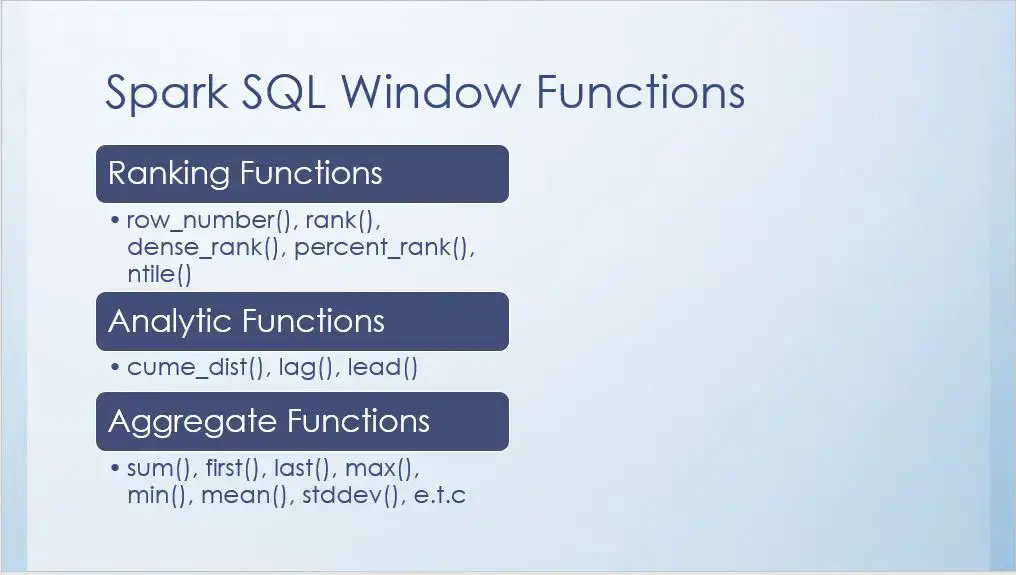

In [7]:
df2 = spark.read.csv("/content/train.csv",inferSchema = True , header = True)

In [8]:
df2.show()

+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [9]:
df2.count()

1058

In [10]:
length  = len(df2.columns)
print(length)

35


In [11]:
from pyspark.sql import Window
import pyspark.sql.functions as F
import pyspark.sql.types as T
 

In [12]:
windowsSpec = Window.partitionBy("Department").orderBy("MonthlyIncome")

data =( df2.withColumn("list_salary" , F.collect_list(F.col("MonthlyIncome")).over(windowsSpec))
           .withColumn("avg_salary" , F.avg(F.col("MonthlyRate")).over(windowsSpec))
           .withColumn("total_salary" , F.sum(F.col("MonthlyIncome")).over(windowsSpec))
)
data.show()

+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+--------------------+------------------+------------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears

In [13]:
df2.select("Department").distinct().show()

+--------------------+
|          Department|
+--------------------+
|               Sales|
|Research & Develo...|
|     Human Resources|
+--------------------+



**row_number():** This function assigns a unique sequential number to each row within a partition, based on the ordering specified in the window.row_number() requires orderBy() in windowsSpec

In [14]:
row_num = df2.withColumn("Row_Num", F.row_number().over(windowsSpec))
row_num.show()

+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+-------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsA

rank() , dense_rank() , persent_rank()

**rank()**: This function assigns a rank to each row within a partition based on the ordering specified in the window, where rows with the same value are assigned the same rank and the next rank is skipped.

agar orderBy mai 2 number ya entries same rahe 

Ex:

    sal     Rank
    1122     1
    1122     1
    456      3

In [15]:
rank_df = df2.withColumn("Rank_Func", F.rank().over(windowsSpec))
rank_df.show()

+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|Year

**dense_rank()**: This function assigns a rank to each row within a partition based on the ordering specified in the window, where rows with the same value are assigned the same rank and the next rank is not skipped

Ex:

    sal     Rank
    1122     1
    1122     1
    456      2

In [16]:
den_rank_df = df2.withColumn("Dense_Rank" , F.dense_rank().over(windowsSpec))
den_rank_df.show()

+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+----------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|Yea

**percent_rank(): **This function assigns a percentile rank to each row within a partition based on the ordering specified in the window, where the rank is calculated as (rank - 1) / (total rows - 1).


In [17]:

persent_rank_df = df2.withColumn("Dense_Rank" , F.persent_rank().over(windowsSpec))

AttributeError: ignored



**ntile()**: This function assigns a group number to each row within a partition based on the ordering specified in the window, where the number of groups is specified by the user.

In [18]:
ntile_df = df2.withColumn("ntile_df" , F.ntile(4).over(windowsSpec))
ntile_df.show()

+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+--------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|Years

**cume_dist()** window function is used to get the cumulative distribution of values within a window partition.This is the same as the DENSE_RANK function in SQL

In [19]:
cume_dist_df = df2.withColumn("Analytics_CD" , F.cume_dist().over(windowsSpec))
cume_dist_df.show()

+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+-------------------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBa

**lag():** This function returns the value of a column from a previous row within a window partition, based on a specified offset. If the offset is greater than the number of rows preceding the current row, the function returns a null value.This is the same as the LAG function in SQL.

In [20]:
lag_df = df2.withColumn("lag_ex",F.lag(col("Department"), 1).over(windowsSpec))
lag_df.show()

+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

**lead():** This function returns the value of a column from a following row within a window partition, based on a specified offset. If the offset is greater than the number of rows following the current row, the function returns a null value.This is the same as the LEAD function in SQL.



In [21]:
df2.withColumn("lead_ex",F.lead(col("Department"), 1).over(windowsSpec)).show()


+---+---------+-----------------+---------+---------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+---------------+
|Age|Attrition|   BusinessTravel|DailyRate|     Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|        JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalanc

In [52]:
df2.where("Age > 46 and MonthlyIncome > 6000").show()

+---+---------+-----------------+---------+--------------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBa

In [63]:
df2.where((col("Age") > "46") & (col("MonthlyIncome") > "5000")).show()

+---+---------+-----------------+---------+--------------------+----------------+---------+----------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|  EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBa

**regexp_replace() vs regexp_extract**

In [22]:
from pyspark.sql.functions import regexp_extract
df = spark.createDataFrame([('100-200',)], ['str'])
df.select(regexp_extract('str', r'(\d+)-(\d+)',1).alias('d')).collect()

[Row(d='100')]

In [23]:
df = spark.createDataFrame([('foo',)], ['str'])
df.select(regexp_extract('str', r'(\d+)', 1).alias('d')).collect()


[Row(d='')]

In [24]:
df = spark.createDataFrame([('aaaac',)], ['str'])
df.select(regexp_extract('str', '(a+)(b)?(c)', 2).alias('d')).collect()

[Row(d='')]

In [25]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('RegexExtractExample').getOrCreate()

data = [("1", "Hello, my email address is john@example.com"), ("2", "Please send me an email at alice@example.com")]

df = spark.createDataFrame(data, ["id", "text"])
df.show(truncate=False)


+---+--------------------------------------------+
|id |text                                        |
+---+--------------------------------------------+
|1  |Hello, my email address is john@example.com |
|2  |Please send me an email at alice@example.com|
+---+--------------------------------------------+



In [26]:
from pyspark.sql.functions import regexp_extract

email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

df = df.withColumn("email", regexp_extract("text", email_pattern, 0))
df.show(truncate=False)


+---+--------------------------------------------+-----------------+
|id |text                                        |email            |
+---+--------------------------------------------+-----------------+
|1  |Hello, my email address is john@example.com |john@example.com |
|2  |Please send me an email at alice@example.com|alice@example.com|
+---+--------------------------------------------+-----------------+



# foreach() vs foreachpartition()

In [35]:
sc = spark.sparkContext

**foreach():** This method applies a function to each element of a RDD.

**foreachPartition():** This method applies a function to each partition of a RDD. This can be useful for performing some initialization or cleanup operations on a per-partition basis.

In [44]:

# Example for foreach()
rdd = sc.parallelize([1, 2, 3, 4, 5])
def print_element(elem):
    print(elem)

rdd.foreach(print_element)  # This will print each element of the RDD to the console

# Example for foreachPartition()
rdd = sc.parallelize([1, 2, 3, 4, 5], 2)
def process_partition(partition):
    for elem in partition:
        print(elem)

rdd.foreachPartition(process_partition)

# map(): This method applies a function to each element of a RDD and returns a new RDD with the transformed values.



# mapPartitions(): is a PySpark RDD transformation operation that applies a given function to each partition of an RDD

In [46]:
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9])
def square(sq):
  return sq**2

pp = rdd.map(square)
pp.collect()

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [49]:
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9],2)
def square(sq):
  return [sqr**2 for sqr in sq]

pp = rdd.mapPartitions(square)
pp.collect()

[1, 4, 9, 16, 25, 36, 49, 64, 81]

# functions like fill.na drop.na drop fill practice

# Read Articles about SparkUI and garbage collector and DAGs 